In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Importing the Dataset

In [2]:
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')

### Summary of The Dataset

In [3]:
#quick look at our data types & null counts 
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [4]:
train_file.head(7)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,...,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,...,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes


In [5]:
# better understanding of the numeric data 
train_file.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [6]:
#function converting str to int in a particular column
train_file.default_status = train_file.default_status.apply(lambda x: x.replace("no","0"))
train_file.default_status = train_file.default_status.apply(lambda x: x.replace("yes","1"))

In [7]:
train_file.default_status.astype(str).astype(int)

0        0
1        0
2        1
3        0
4        0
        ..
55995    0
55996    1
55997    0
55998    0
55999    0
Name: default_status, Length: 56000, dtype: int32

In [8]:
train_file['train_test'] = 1
test_file['train_test'] = 0
all_data = pd.concat([train_file,test_file])

## Data Visualization

array([[<AxesSubplot:title={'center':'form_field1'}>,
        <AxesSubplot:title={'center':'form_field3'}>],
       [<AxesSubplot:title={'center':'form_field7'}>,
        <AxesSubplot:title={'center':'form_field14'}>],
       [<AxesSubplot:title={'center':'form_field15'}>,
        <AxesSubplot:title={'center':'form_field28'}>]], dtype=object)

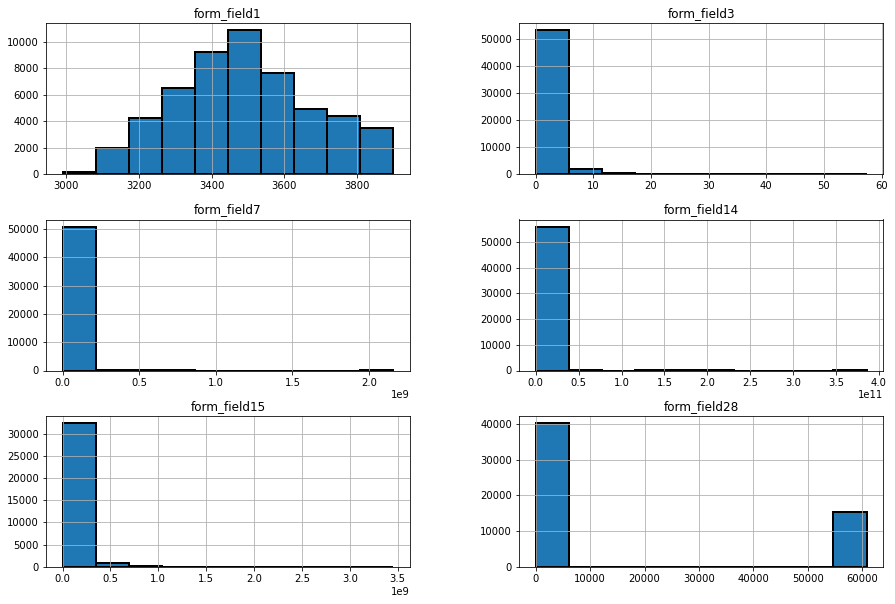

In [9]:
train_file[["form_field1","form_field3","form_field7","form_field14","form_field15","form_field28"]].hist(edgecolor = 'black', linewidth=2, figsize=(15,10))

<AxesSubplot:>

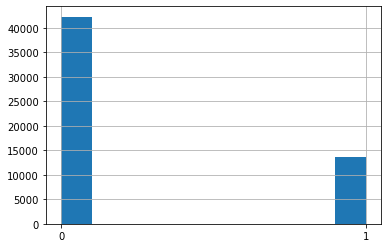

In [10]:
train_file.default_status.hist()

In [11]:
#impute nulls for continuous data 
all_data.form_field1 = all_data.form_field1.fillna(train_file.form_field1.median())
all_data.form_field3 = all_data.form_field3.fillna(train_file.form_field3.median())
all_data.form_field7 = all_data.form_field7.fillna(train_file.form_field7.median())
all_data.form_field15 = all_data.form_field15.fillna(train_file.form_field15.median())
all_data.form_field28 =all_data.form_field28.fillna(train_file.form_field28.median())

In [12]:
all_data

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,train_test
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.0000,0.0,10689720.0,252072.0,4272776.0,...,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0,1
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.0000,0.0,898979.0,497531.0,9073814.0,...,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0,1
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.2820,NaN,956940.0,NaN,192944.0,...,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.0000,192166.0,3044703.0,385499.0,3986472.0,...,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0,1
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.0000,1556.0,214728.0,214728.0,1284089.0,...,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Apcnt_999940,3258.0,0.37925,0.5698,5.1282,0.0000,NaN,2280318.0,NaN,NaN,...,0.00,0.800000,NaN,1.0,charge,NaN,0.000000,NaN,NaN,0
23996,Apcnt_999956,3514.0,0.95260,0.0000,0.0000,0.0000,1494538.0,4773419.0,4773419.0,89718571.0,...,12.12,0.196400,0.0,0.0,charge,4200.072959,3.000000,0.930931,NaN,0
23997,Apcnt_999976,3302.0,0.05755,4.2394,0.0000,25.4376,NaN,49403.0,NaN,NaN,...,1.01,0.800000,NaN,0.0,charge,NaN,4.855060,NaN,NaN,0
23998,Apcnt_999984,3334.0,0.75670,1.4428,0.0000,0.0000,0.0,2513329.0,37733.0,393668.0,...,2.02,0.519776,NaN,0.0,charge,27.325129,0.818733,0.023749,NaN,0


## Applying Classification Model

In [13]:
# Seperating the data into dependent and independent variables
X_train = all_data[all_data.train_test==1][["form_field1","form_field3","form_field7","form_field14","form_field15","form_field28","train_test"]]
y_train = all_data[all_data.train_test==1].default_status
# X_test = all_data[all_data.train_test==0][["form_field1","form_field3","form_field7","form_field14","form_field15","form_field28","train_test"]]
# y_test = all_data[all_data.train_test==0].default_status

In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Logistic Regression

In [25]:
# LogisticRegression
model = LogisticRegression()
model.fit = model.fit(X_train, y_train)
predictions = model.fit.predict(X_test)

In [16]:
# Summary of the predictions made by the classifier
accuracy_score(y_test,predictions)

0.7583333333333333

In [17]:
print(confusion_matrix(y_test, predictions))

[[12739     0]
 [ 4060     1]]


In [18]:
final_sub = all_data[["Applicant_ID", "default_status"]]
final_sub

,Applicant_ID,default_status
0,Apcnt_1000000,0
1,Apcnt_1000004,0
2,Apcnt_1000008,1
3,Apcnt_1000012,0
4,Apcnt_1000016,0
...,...,...
23995,Apcnt_999940,NaN
23996,Apcnt_999956,NaN
23997,Apcnt_999976,NaN
23998,Apcnt_999984,NaN


In [19]:
ee = all_data[all_data.train_test==1].default_status.reshape(-1,1)
ii = model.fit.predict(ee)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
train_file.Applicant_ID.count()

In [ ]:
for data in all_data['Applicant_ID']:
    print(data)